### $\int \omega(\theta)d\theta$ vs $K_{abs}$

R-squared: 0.932
R-squared: 0.880
R-squared: 0.963


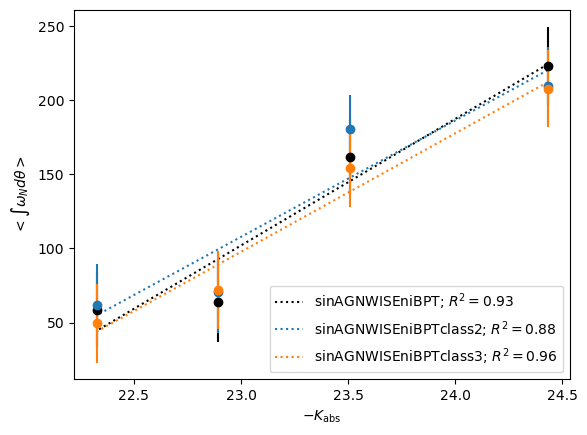

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nquant = int(4)
nbootstrap = int(100)

fig, ax = plt.subplots()


for sample, color in zip(['sinAGNWISEniBPT','sinAGNWISEniBPTclass2','sinAGNWISEniBPTclass3'],['k','C00','C01']):

    filename = f'../data/int_K_nq{nquant}_nbs{nbootstrap}_{sample}.npz'


    data = ascii.read(filename)

    from scipy import stats

    meanMag = data['meanMag']
    int_mean = data['int_mean']
    int_std = data['int_std']

    res = stats.linregress(-meanMag, int_mean)
    print(f"R-squared: {res.rvalue**2:.3f}")

    ax.plot(-meanMag, res.intercept - res.slope*meanMag, ls=':',c=color,\
            label=f'{sample}; '+r'$R^2=$'+f'{res.rvalue**2:.2f}')

    for i in range(len(int_mean)):
        ax.errorbar(-meanMag[i],int_mean[i],yerr=int_std[i],c=color,fmt='o')


ax.set_ylabel(r'$<\int\omega_Nd\theta>$')
ax.set_xlabel(r'$-K_{\mathrm{abs}}$')

ax.legend(loc=4)

plt.savefig(f'../plots/int_K_nq{nquant}_nbs{nbootstrap}_comparison.png')

plt.show()



### Autocorrelations

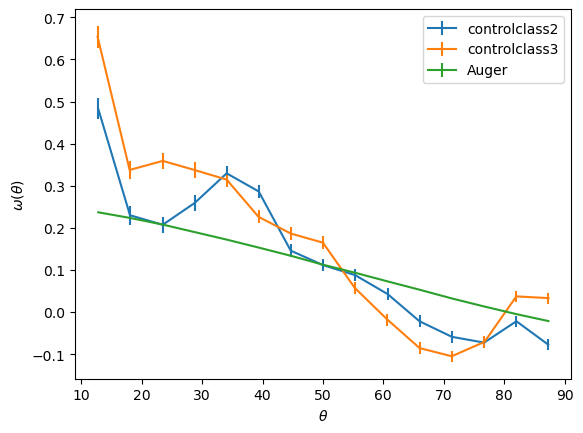

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nquant = int(4)
nbootstrap = int(100)

fig, ax = plt.subplots()


for sample, color in zip(['controlclass2','controlclass3','Auger'],['C00','C01','C02']):

    try:
        filename = f'../data/autoCorr_nbs{nbootstrap}_{sample}.npz'
        data = ascii.read(filename)

    except FileNotFoundError:
        filename = f'../data/autoCorr_nbs50_{sample}.npz'
        data = ascii.read(filename)


    from scipy import stats

    xi_mean = data['xi_mean']
    varxi = data['varxi']
    theta = data['theta']

    ax.errorbar(theta,xi_mean,yerr=np.sqrt(varxi),c=color,fmt='-',label=sample)


ax.set_ylabel(r'$\omega(\theta)$')
ax.set_xlabel(r'$\theta$')

ax.legend()

plt.savefig(f'../plots/autoCorr_nbs{nbootstrap}_comparison.png')

plt.show()



##### Redshift distributions

308
1009


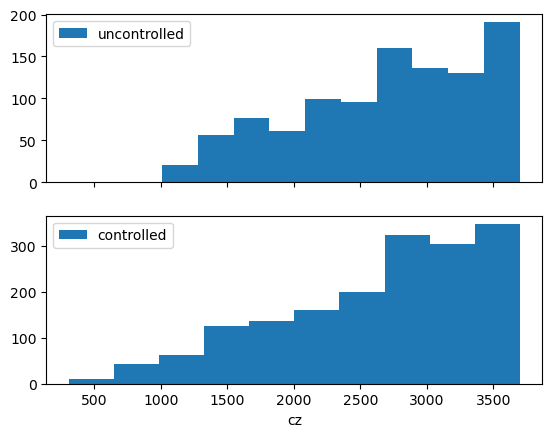

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nquant = int(4)
nbootstrap = int(100)

filename_u = '../data/2MRSxWISE_VLS_d1d5_sinAGNWISEniBPT.txt'
filename_c = '../data/2MRSxWISE_VLS_d1d5_sinAGNWISEniBPT_control_SF_passive_cz_Kabs_ang5_cz1000.txt'

uncontrolled = ascii.read(filename_u)
controlled = ascii.read(filename_c)

print(uncontrolled['cz'].min())
print(controlled['cz'].min())

fig, axs = plt.subplots(2, sharex=True)

axs[0].hist(controlled['cz'],label='controlled')
axs[1].hist(uncontrolled['cz'],label='uncontrolled')

axs[1].set_xlabel('cz')
#ax.set_ylabel(r'$\omega(\theta)$')
#ax.set_xlabel(r'$\theta$')

axs[0].legend()
axs[1].legend()

#plt.savefig(f'../plots/autoCorr_nbs{nbootstrap}_comparison.png')

plt.show()



### Autocorrelations UNCONTROLLED samples

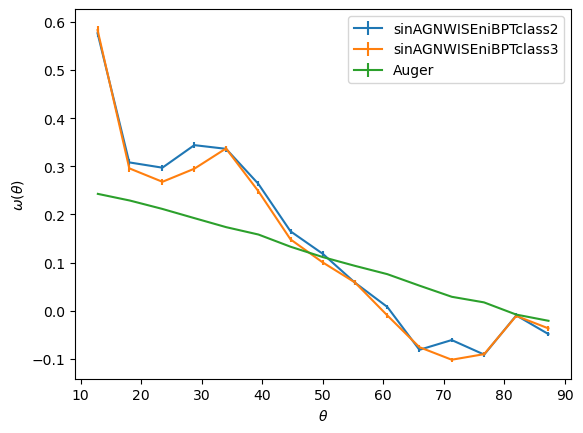

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nquant = int(4)
nbootstrap = int(100)

fig, ax = plt.subplots()


for sample, color in zip(['sinAGNWISEniBPTclass2','sinAGNWISEniBPTclass3','Auger'],['C00','C01','C02']):

    try:
        filename = f'../data/autoCorr_nbs{nbootstrap}_{sample}.npz'
        data = ascii.read(filename)

    except FileNotFoundError:
        filename = f'../data/autoCorr_nbs50_{sample}.npz'
        data = ascii.read(filename)


    from scipy import stats

    xi_mean = data['xi_mean']
    varxi = data['varxi']
    theta = data['theta']

    ax.errorbar(theta,xi_mean,yerr=np.sqrt(varxi),c=color,fmt='-',label=sample)


ax.set_ylabel(r'$\omega(\theta)$')
ax.set_xlabel(r'$\theta$')

ax.legend()

plt.savefig(f'../plots/autoCorr_nbs{nbootstrap}_nocontrol_comparison.png')

plt.show()



## NEW SAMPLES: Controlled ang5 and z, free K

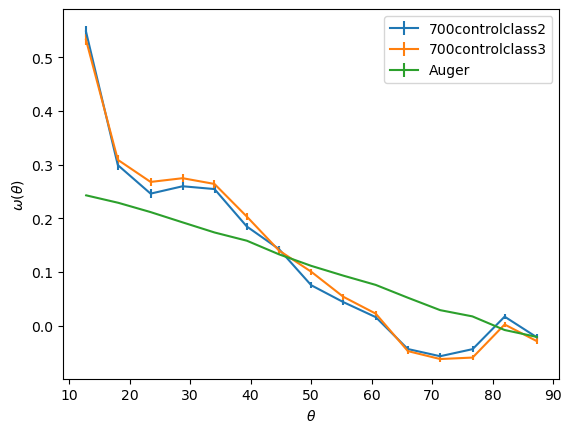

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nquant = int(4)
nbootstrap = int(100)

fig, ax = plt.subplots()


for sample, color in zip(['700controlclass2','700controlclass3','Auger'],['C00','C01','C02']):

    try:
        filename = f'../data/autoCorr_nbs{nbootstrap}_{sample}.npz'
        data = ascii.read(filename)

    except FileNotFoundError:
        filename = f'../data/autoCorr_nbs50_{sample}.npz'
        data = ascii.read(filename)


    from scipy import stats

    xi_mean = data['xi_mean']
    varxi = data['varxi']
    theta = data['theta']

    ax.errorbar(theta,xi_mean,yerr=np.sqrt(varxi),c=color,fmt='-',label=sample)


ax.set_ylabel(r'$\omega(\theta)$')
ax.set_xlabel(r'$\theta$')

ax.legend()

plt.savefig(f'../plots/autoCorr_nbs{nbootstrap}_700control_comparison.png')
plt.show()



R-squared: 0.956
R-squared: 0.967
R-squared: 0.507
R-squared: 0.992


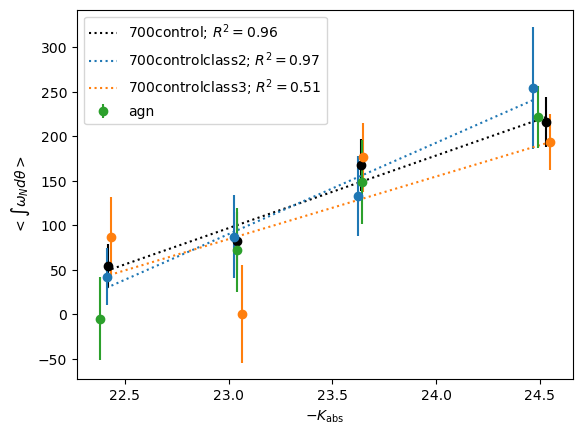

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nquant = int(4)
nbootstrap = int(500)

fig, ax = plt.subplots()

samples = ['700control','700controlclass2','700controlclass3']
colors = ['k','C00','C01']

for sample, color in zip(samples,colors):

    filename = f'../data/int_K_nq{nquant}_nbs{nbootstrap}_{sample}.npz'

    data = ascii.read(filename)

    from scipy import stats

    meanMag = data['meanMag']
    int_mean = data['int_mean']
    int_std = data['int_std']

    res = stats.linregress(-meanMag, int_mean)
    print(f"R-squared: {res.rvalue**2:.3f}")

    ax.plot(-meanMag, res.intercept - res.slope*meanMag, ls=':',c=color,\
            label=f'{sample}; '+r'$R^2=$'+f'{res.rvalue**2:.2f}')

    for i in range(len(int_mean)):
        ax.errorbar(-meanMag[i],int_mean[i],yerr=int_std[i],c=color,fmt='o')

"""
Plot AGNs
"""
sample = 'agn'
color = 'C02'
filename = f'../data/int_K_nq{nquant}_nbs{nbootstrap}_{sample}.npz'

data = ascii.read(filename)
meanMag = data['meanMag']
int_mean = data['int_mean']
int_std = data['int_std']

res = stats.linregress(-meanMag, int_mean)
print(f"R-squared: {res.rvalue**2:.3f}")

#ax.plot(-meanMag, res.intercept - res.slope*meanMag, ls=':',c=color,\
#        label=f'{sample}; '+r'$R^2=$'+f'{res.rvalue**2:.2f}')

#for i in range(len(int_mean)):
ax.errorbar(-meanMag,int_mean,yerr=int_std,c=color,fmt='o',label=sample)


ax.set_ylabel(r'$<\int\omega_Nd\theta>$')
ax.set_xlabel(r'$-K_{\mathrm{abs}}$')

ax.legend(loc=0)

plt.savefig(f'../plots/int_K_nq{nquant}_nbs{nbootstrap}_700control_comparison.png')

plt.show()



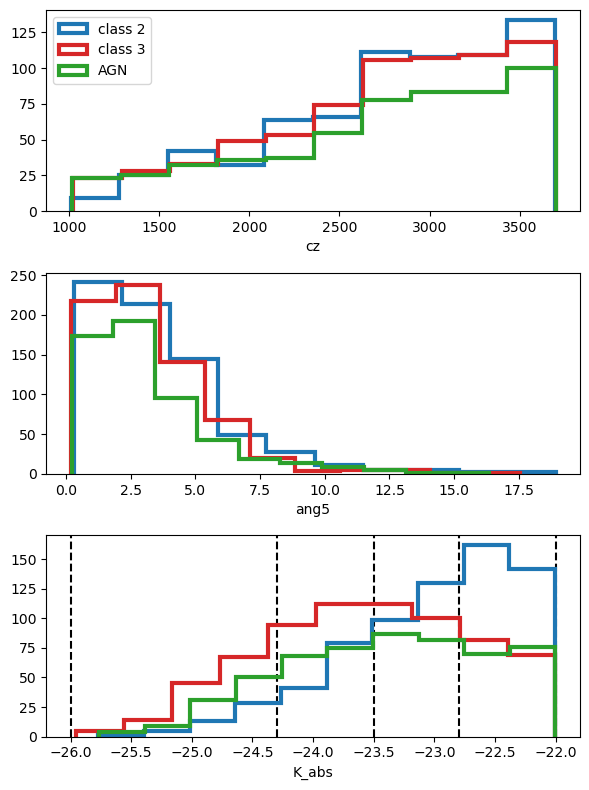

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nquant = int(4)
nbootstrap = int(100)

filename = '../data/VLS_ang5_cz_700control.txt'
filenameAGN = '../data/VLS_WISEorBPT_AGNs.txt'

data = ascii.read(filename)
data2 = data[data['class']==2]
data3 =  data[data['class']==3]
dataAGN = ascii.read(filenameAGN)

fig, axs = plt.subplots(3, sharex=False, figsize=(6, 8))

# Redshift
axs[0].hist(data2['cz'],label='class 2',histtype='step',color='C00',linewidth=3)
axs[0].hist(data3['cz'],label='class 3',histtype='step',color='C03',linewidth=3)
axs[0].hist(dataAGN['cz'],label='AGN',histtype='step',color='C02',linewidth=3)

# Ang5
axs[1].hist(data2['ang5'],label='class 2',histtype='step',color='C00',linewidth=3)
axs[1].hist(data3['ang5'],label='class 3',histtype='step',color='C03',linewidth=3)
axs[1].hist(dataAGN['ang5'],label='AGN',histtype='step',color='C02',linewidth=3)

# K

# nq = 4
# quantiles2 = np.quantile(data2['K_abs'], np.linspace(0, 1, nq+1))
# quantiles3 = np.quantile(data3['K_abs'], np.linspace(0, 1, nq+1))
# axs[2].vlines(quantiles2, ymin=0, ymax=.3, color='C00', linestyle='--', transform=axs[2].get_xaxis_transform())

bines = np.array([-26,-24.3,-23.5,-22.8,-22.])
axs[2].vlines(bines, ymin=0, ymax=1, color='k', linestyle='--', transform=axs[2].get_xaxis_transform())

axs[2].hist(data2['K_abs'],label='class 2',histtype='step',color='C00',linewidth=3)
axs[2].hist(data3['K_abs'],label='class 3',histtype='step',color='C03',linewidth=3)
axs[2].hist(dataAGN['K_abs'],label='AGN',histtype='step',color='C02',linewidth=3)

# Lables
axs[0].set_xlabel('cz')
axs[1].set_xlabel('ang5')
axs[2].set_xlabel('K_abs')

#ax.set_ylabel(r'$\omega(\theta)$')
#ax.set_xlabel(r'$\theta$')

axs[0].legend()

plt.tight_layout()
plt.savefig(f'../plots/variables_700control.png')
plt.show()


#### All gxs (no AGN)

R-squared: 0.911


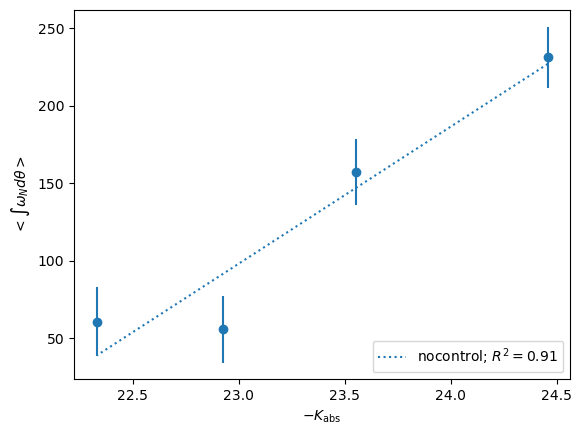

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nquant = int(4)
nbootstrap = int(100)

fig, ax = plt.subplots()


for sample, color in zip(['nocontrol'],['C00']):

    filename = f'../data/int_K_nq{nquant}_nbs{nbootstrap}_{sample}.npz'


    data = ascii.read(filename)

    from scipy import stats

    meanMag = data['meanMag']
    int_mean = data['int_mean']
    int_std = data['int_std']

    res = stats.linregress(-meanMag, int_mean)
    print(f"R-squared: {res.rvalue**2:.3f}")

    ax.plot(-meanMag, res.intercept - res.slope*meanMag, ls=':',c=color,\
            label=f'{sample}; '+r'$R^2=$'+f'{res.rvalue**2:.2f}')

    for i in range(len(int_mean)):
        ax.errorbar(-meanMag[i],int_mean[i],yerr=int_std[i],c=color,fmt='o')


ax.set_ylabel(r'$<\int\omega_Nd\theta>$')
ax.set_xlabel(r'$-K_{\mathrm{abs}}$')

ax.legend(loc=4)

plt.savefig(f'../plots/int_K_nq{nquant}_nbs{nbootstrap}_nocontrol_comparison.png')

plt.show()

